<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *8*: *Clustering***

###**Tenggat Waktu: XX Bulan 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **XX Bulan 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [79]:
# Isi dengan data diri Anda
NAMA = "Yudi Putra Sabri"
KELAS = "D"
NPM = "2106706123"
TIM_KAGGLE = "YudiSabri"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [80]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Yudi Putra Sabri dari kelas D dengan NPM 2106706123, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Yudi Putra Sabri)


# Deskripsi Dataset

Penjelasan dataset:

1. **mcg**: McGeoch's method for signal sequence recognition.
2. **gvh**: von Heijne's method for signal sequence recognition.
3. **lip**: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
4. **chg**: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
5. **aac**: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
6. **alm1**: score of the ALOM membrane spanning region prediction program.
7. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

Dataset source: https://archive.ics.uci.edu/dataset/39/ecoli

In [81]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

# **Preparing Dataset**

In [82]:
df = pd.read_csv("ecoli.csv")
df

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,8
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,8
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,8
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,8


In [83]:
df.nunique()

mcg      78
gvh      63
lip       2
chg       2
aac      59
alm1     82
alm2     77
class     8
dtype: int64

# **Clustering**

### **Pengertian**

**Pengelompokan atau *clustering***, yang merupakan bagian dari unsupervised learning, melibatkan proses mengelompokkan sejumlah titik data ke dalam beberapa kelompok atau klaster sedemikian rupa sehingga objek dalam klaster yang sama memiliki tingkat kemiripan yang tinggi, sementara objek dalam klaster yang berbeda memiliki tingkat kemiripan yang rendah. Berbeda dengan supervised learning, clustering tidak memerlukan label yang terkait dengan setiap objek; sebaliknya, tujuannya adalah untuk menemukan pola dalam data, yang mungkin ada atau mungkin juga tidak (data mungkin tidak memiliki klaster yang jelas). Penting untuk dicatat bahwa algoritma pengelompokan tidak menjelaskan secara eksplisit makna dari setiap klaster, sehingga Anda perlu menginterpretasikannya sendiri, mungkin dengan melakukan visualisasi seperti yang akan dibahas dalam sesi lab kali ini.

### **Motivasi**

Motivasi dari _unsupervised learning_ adalah untuk mengungkap pola, struktur, dan wawasan yang mungkin tersembunyi dalam data tanpa adanya petunjuk atau label yang jelas. Berikut adalah beberapa alasan mengapa _unsupervised learning_ sangat penting dan memiliki motivasi yang kuat:

1. **Penemuan Pola Tersembunyi**: Seringkali, data dunia nyata tidak selalu dilengkapi dengan label yang menjelaskan apa yang ada di dalamnya. Dalam banyak kasus, kita mungkin tidak tahu apa yang harus dicari atau apa yang mungkin ada dalam data. _Unsupervised learning_ memungkinkan kita untuk mengeksplorasi data dan menemukan pola atau struktur yang mungkin tersembunyi, tanpa harus memiliki pengetahuan sebelumnya tentang apa yang harus dicari.

2. **Segmentasi Data**: _Unsupervised learning_ memungkinkan kita untuk mengelompokkan data ke dalam kelompok atau klaster yang memiliki karakteristik atau kemiripan tertentu. Contohnya, dalam analisis pelanggan, kita dapat mengelompokkan pelanggan ke dalam segmen yang berbeda berdasarkan perilaku atau preferensi mereka. Ini dapat membantu perusahaan dalam mengarahkan strategi pemasaran yang lebih efektif.

3. **Ekstraksi Fitur**: Algoritma _unsupervised learning_ dapat digunakan untuk mengekstraksi fitur-fitur penting dari data. Ini bermanfaat dalam mereduksi dimensi data, mengurangi kebisingan, atau mengungkapkan karakteristik yang relevan dalam dataset yang besar. Contohnya, dalam pengolahan citra, kita dapat menggunakan _dimensionality reduction_ untuk mengurangi jumlah fitur yang tidak relevan.

4. **Anomali Detection**: _Unsupervised learning_ juga dapat digunakan untuk mendeteksi anomali dalam data. Ini berguna dalam kasus di mana kita mencoba menemukan data yang tidak biasa atau data yang tidak mengikuti pola mayoritas. Misalnya, dalam keamanan jaringan, kita dapat menggunakan _unsupervised learning_ untuk mendeteksi serangan siber yang tidak biasa.

5. **Preprocessing Data**: _Unsupervised learning_ sering digunakan sebagai tahap awal dalam analisis data sebelum kita beralih ke metode _supervised learning_. Ini termasuk membersihkan data, mengisi data yang hilang, atau mengurangi dimensi data sebelum melatih model prediksi.

6. **Penelitian Ilmiah dan Penemuan Baru**: Dalam beberapa kasus, _unsupervised learning_ digunakan dalam penelitian ilmiah untuk menemukan wawasan baru dalam data. Contohnya, dalam bidang ilmu genetika, analisis _unsupervised learning_ dapat membantu mengungkap pola baru dalam ekspresi gen atau perbedaan dalam populasi.

Dalam rangkaian kasus di atas, _unsupervised learning_ memberikan cara untuk mengungkap dan memahami data yang mungkin sulit dipahami atau dianalisis dengan metode lain. Ini membuatnya menjadi alat yang kuat dalam berbagai bidang, termasuk ilmu data, kecerdasan buatan, pengolahan bahasa alami, penglihatan komputer, dan banyak lagi.

### **Jenis-jenis Algoritma**

Ada banyak algoritma _clustering_ yang digunakan untuk mengelompokkan data dalam berbagai konteks. Berikut beberapa algoritma _clustering_ yang umum digunakan:

1. **K-Means**: Algoritma _K-Means_ adalah salah satu algoritma _clustering_ paling populer. Ini membagi data menjadi _K_ kluster di mana setiap titik data termasuk dalam kluster dengan pusat yang terdekat. Tujuan utamanya adalah untuk mengurangi variasi dalam kluster dan memaksimalkan variasi antara kluster.

2. **Hierarchical Clustering**: Algoritma _clustering_ hierarki membangun hirarki kluster dengan menggabungkan atau membagi kluster dalam langkah-langkah yang berurutan. Ini menghasilkan pohon kluster yang dapat diwakili sebagai _dendrogram_, yang memungkinkan analisis tingkat hierarki.

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Algoritma _DBSCAN_ mengelompokkan data berdasarkan kerapatan. Ini mengidentifikasi kluster sebagai daerah di mana terdapat titik data yang cukup padat, sementara titik yang berada jauh dari kluster dianggap sebagai _noise_.

4. **Agglomerative Clustering**: Ini adalah pendekatan hierarkis untuk pengelompokan di mana setiap titik data dianggap sebagai kluster tunggal dan kemudian secara berurutan menggabungkan kluster yang paling dekat satu sama lain hingga satu kluster besar terbentuk.

Pilihan algoritma _clustering_ bergantung pada karakteristik data dan tujuan analisis. Setiap algoritma memiliki kelebihan dan kelemahan yang harus dipertimbangkan sesuai dengan kebutuhan Anda.

Pada lab kali ini kita hanya akan membahas atau menggunakan beberapa algoritma yang dijelaskan pada slide yang tersedia yakni **K-Means** dan **Hierarchical**

# **Latihan Soal Praktis** [70]

**Prapemrosesan data:**
Sebelum menjalankan algoritma clustering, pastikan Anda memahami dataset yang digunakan (minimal mengetahui fitur-fitur apa saja yang ada beserta tipe datanya). Selain itu, lakukan pre-processing pada data agar siap digunakan untuk clustering menggunakan K-Means. Berikut adalah hal-hal yang perlu dilakukan.

- Handle missing value: Untuk menentukan klaster, diperlukan perhitungan jarak sedangkan missing value tidak bisa dihitung jaraknya. Contoh penanganannya adalah imputasi dengan mean/median tergantung bentuk distribusi data.
- Handle outliers: Algoritma K-Means sangat sensitif terhadap outliers (dapat memengaruhi klaster yang terbentuk). Oleh karena itu, jangan lupa untuk meng-handle outliers dengan heuristics tertentu (misalnya dengan metode capping).
- Standarisasi: K-Means juga sensitif terhadap rentang yang berbeda-beda dari atribut yang digunakan sehingga perlu dilakukan standarisasi data (misal dengan StandardScaler).
- Encoding: Kita bisa juga mengombinasikan atribut numerik dan kategorikal pada K-Means dengan cara mengkodekan atribut kategorikal ke dalam bentuk numerik (misalnya dengan LabelEncoder), kemudian memprosesnya seperti biasa (meskipun ada metode lain seperti K-Prototypes, tetapi hal tersebut di luar scope lab ini).

In [84]:
df.isnull().sum()

mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
class    0
dtype: int64

In [85]:
# Remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

df_no_outliers = df[~outliers]
df_no_outliers

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,1
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,8
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,8
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,8
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,8


In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(scaled, columns=df_no_outliers.columns)
df_scaled

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.034268,-1.469525,0.0,0.0,0.579348,-1.154545,-0.792572,-0.735453
1,-2.124617,-0.625570,0.0,0.0,0.388416,-0.659866,-0.357416,-0.735453
2,0.394082,-0.625570,0.0,0.0,-0.088914,-0.569924,-0.260714,-0.735453
3,0.548288,0.064939,0.0,0.0,0.197484,-0.210158,-0.744221,-0.735453
4,-1.302184,-1.239356,0.0,0.0,0.483882,-1.109574,-0.792572,-0.735453
...,...,...,...,...,...,...,...,...
301,1.319319,0.602001,0.0,0.0,-0.279847,0.824171,-1.034325,2.042925
302,1.165112,0.678725,0.0,0.0,-0.184381,-0.659866,-0.937624,2.042925
303,0.651092,0.908894,0.0,0.0,-0.566245,-0.479983,-0.647520,2.042925
304,0.548288,0.985617,0.0,0.0,-0.757177,-0.345070,-0.695871,2.042925


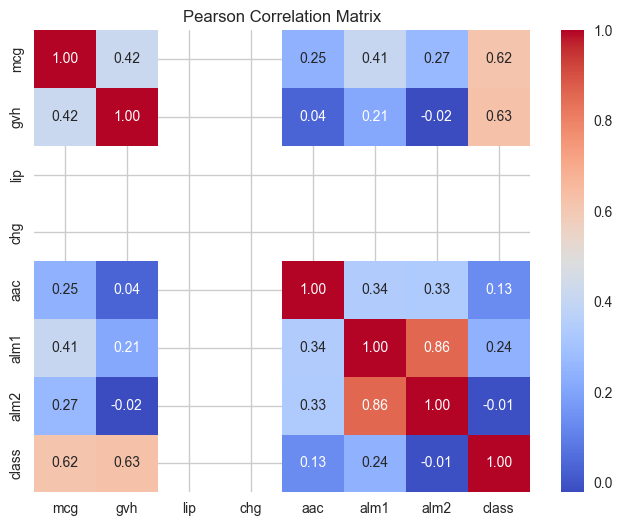

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

pearson_corr_matrix = df_scaled.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})

# Set the title and display the plot
plt.title('Pearson Correlation Matrix')
plt.show()

In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  

k=2
X = df_scaled.drop(columns=["lip", "chg", "class"], axis=1)
y = df_scaled["class"]
selector = SelectKBest(score_func=f_classif, k=k)
selected_features = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

print("Selected feature indices:", selected_indices)

selected_features = X.iloc[:, selected_indices]
df_prime = selected_features
df_prime

Selected feature indices: [3 4]


,alm1,alm2
0,-1.154545,-0.792572
1,-0.659866,-0.357416
2,-0.569924,-0.260714
3,-0.210158,-0.744221
4,-1.109574,-0.792572
...,...,...
301,0.824171,-1.034325
302,-0.659866,-0.937624
303,-0.479983,-0.647520
304,-0.345070,-0.695871


In [89]:
# TODO: After preprocess the data, select some columns for clustering and assign it as X
X = df_prime
X

,alm1,alm2
0,-1.154545,-0.792572
1,-0.659866,-0.357416
2,-0.569924,-0.260714
3,-0.210158,-0.744221
4,-1.109574,-0.792572
...,...,...
301,0.824171,-1.034325
302,-0.659866,-0.937624
303,-0.479983,-0.647520
304,-0.345070,-0.695871


## K-Means Clustering [35]

For n_clusters = 2 The average silhouette_coefficient is : 0.6812844408057158
For n_clusters = 3 The average silhouette_coefficient is : 0.4905531044444784
For n_clusters = 4 The average silhouette_coefficient is : 0.516340803151946
For n_clusters = 5 The average silhouette_coefficient is : 0.4956982413796764
For n_clusters = 6 The average silhouette_coefficient is : 0.45909876037740605
For n_clusters = 7 The average silhouette_coefficient is : 0.47396805677305237
For n_clusters = 8 The average silhouette_coefficient is : 0.46341211635874857


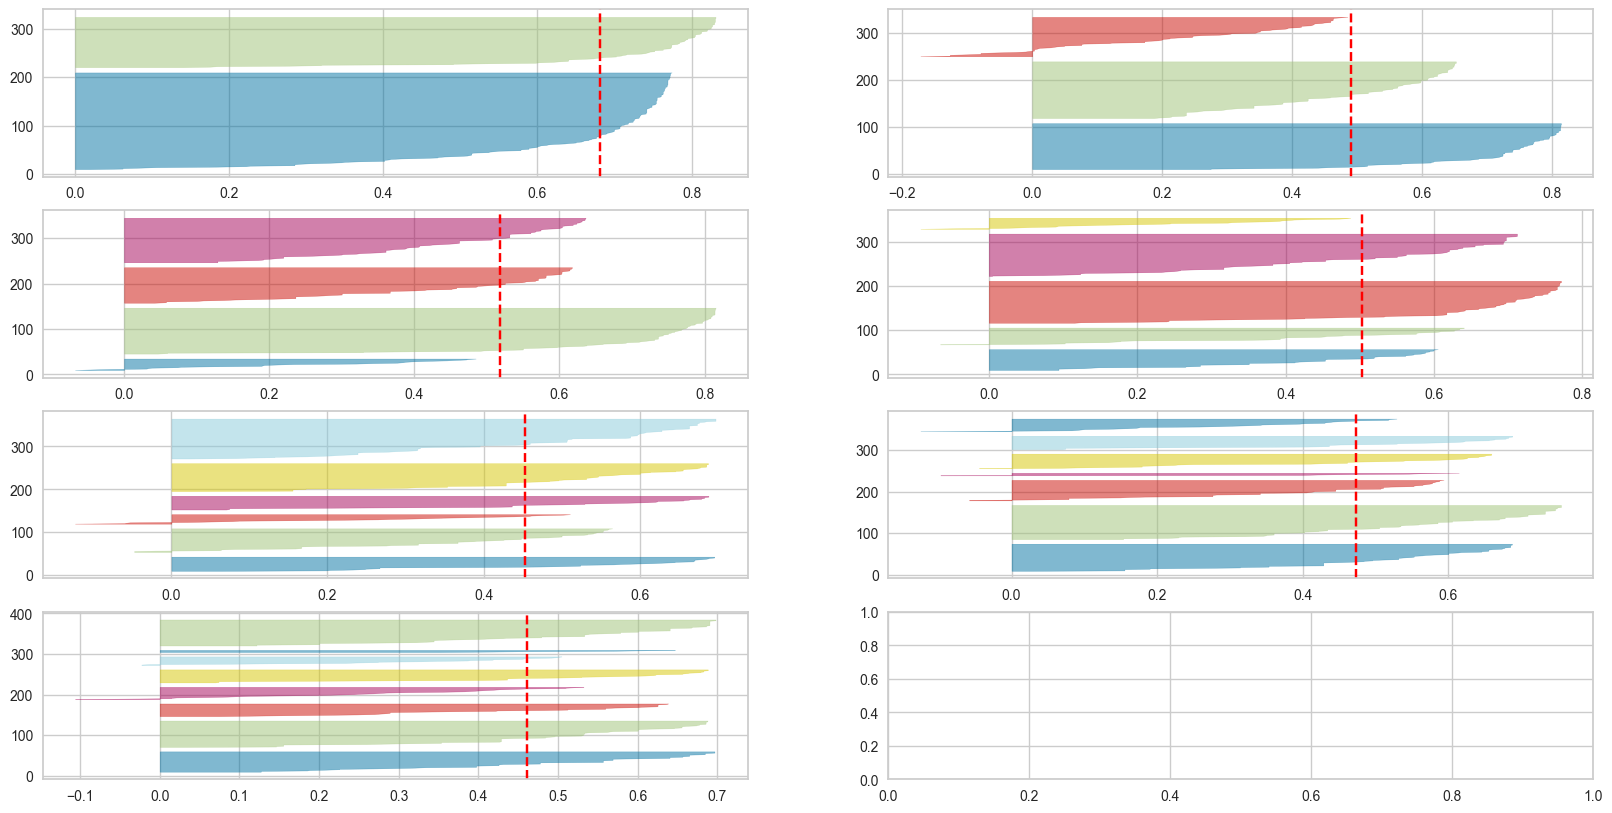

In [90]:
# TODO: Anda dapat menambahkan nilai kemungkinan dari jumlah cluster yang akan dibuat untuk melihat kemungkinan pembentukkan cluster yang lebih baik.
num_of_cluster = [2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(4, 2, figsize=(20,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

In [91]:
# TODO: Anda dapat menyesuaikan nilai dari n_clusters
kmeans = KMeans(n_clusters=3)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=X.columns)
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters


data_with_clusters

c:\Users\YudiSabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,alm1,alm2,Clusters
0,-1.154545,-0.792572,1
1,-0.659866,-0.357416,1
2,-0.569924,-0.260714,2
3,-0.210158,-0.744221,2
4,-1.109574,-0.792572,1
...,...,...,...
301,0.824171,-1.034325,2
302,-0.659866,-0.937624,1
303,-0.479983,-0.647520,1
304,-0.345070,-0.695871,2


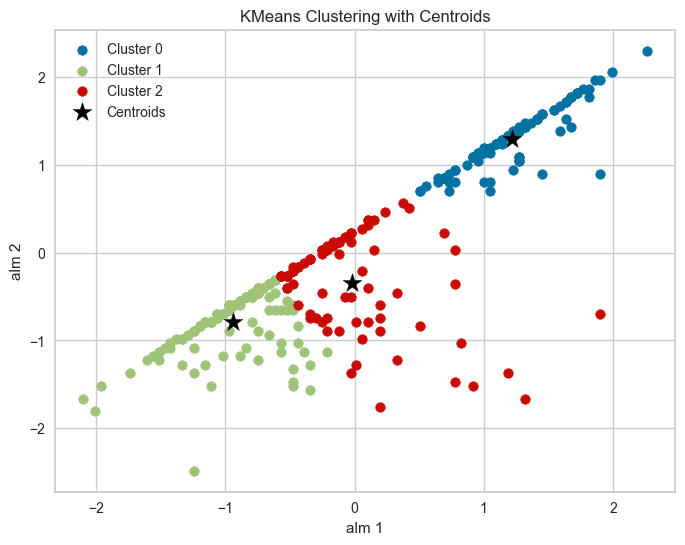

In [92]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

for cluster_label in sorted(data_with_clusters['Clusters'].unique()):
    cluster_data = data_with_clusters[data_with_clusters['Clusters'] == cluster_label]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_label}')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, color='black', label='Centroids')

plt.title('KMeans Clustering with Centroids')
plt.xlabel('alm 1')
plt.ylabel('alm 2')
plt.legend()
plt.show()

## Hierarchical Clustering [35]

In [93]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    shc.dendrogram(linkage_matrix, **kwargs)

In [94]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = 'ward', affinity = 'euclidean')
clustering = model.fit(X)
clustering.labels_

c:\Users\YudiSabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([305, 304, 303, 151, 302, 301, 300, 299, 213, 293, 292, 184, 246,
       177, 290, 289, 291, 156, 287, 286, 152, 183, 251, 267, 211, 217,
       257, 263, 240, 260, 278, 245, 220, 244, 167, 296, 268, 265, 271,
       175, 206, 279, 237, 254, 149, 239, 161, 203, 150, 253, 182, 153,
       283, 168, 277, 256, 235, 255, 144, 269, 166, 273, 295, 288, 252,
       298, 126, 236, 188, 119, 192, 138, 264, 125, 272, 276, 280, 155,
       169, 241, 242, 170, 200, 259, 180, 297, 215, 191, 282, 234, 145,
       281, 198, 270, 178, 250, 135, 129, 258, 139, 249, 238, 212, 228,
       262, 117, 165, 131, 189, 185, 154, 243, 266, 285, 122, 248, 193,
       221, 118, 160, 140, 162, 133, 233, 121, 284, 232, 274,  58,  75,
       247,  77, 134, 230, 261, 132, 127, 141,  65, 231, 229, 275, 143,
       294, 216, 214, 124, 106, 105,  52, 159, 227, 210,  76, 225, 173,
       224, 186, 205, 115,  66, 146, 218, 102, 202, 209, 201, 142, 199,
        99,  62, 204, 197, 222, 171, 114, 226, 137, 172, 158, 20

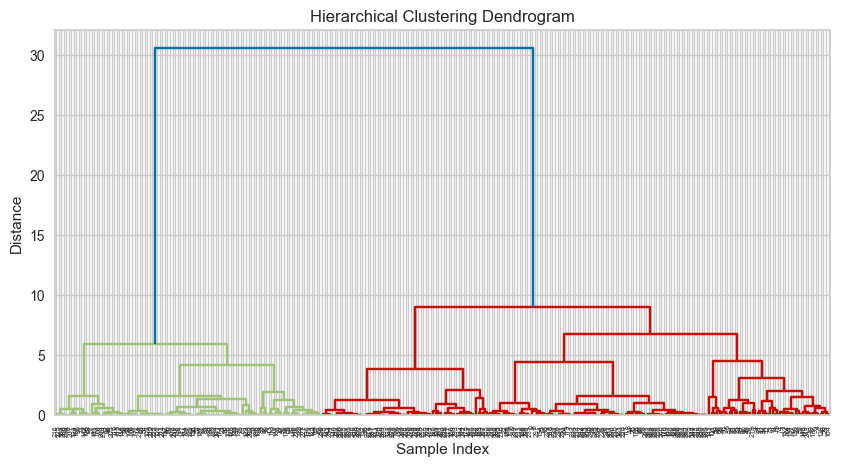

In [98]:
# TODO: Tampilkan dendrogram dari data yang sudah ada.
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [96]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
data_with_clusters['Agg_clusters'] = clustering.fit_predict(X)
data_with_clusters

c:\Users\YudiSabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,alm1,alm2,Clusters,Agg_clusters
0,-1.154545,-0.792572,1,2
1,-0.659866,-0.357416,1,0
2,-0.569924,-0.260714,2,0
3,-0.210158,-0.744221,2,0
4,-1.109574,-0.792572,1,2
...,...,...,...,...
301,0.824171,-1.034325,2,0
302,-0.659866,-0.937624,1,0
303,-0.479983,-0.647520,1,0
304,-0.345070,-0.695871,2,0


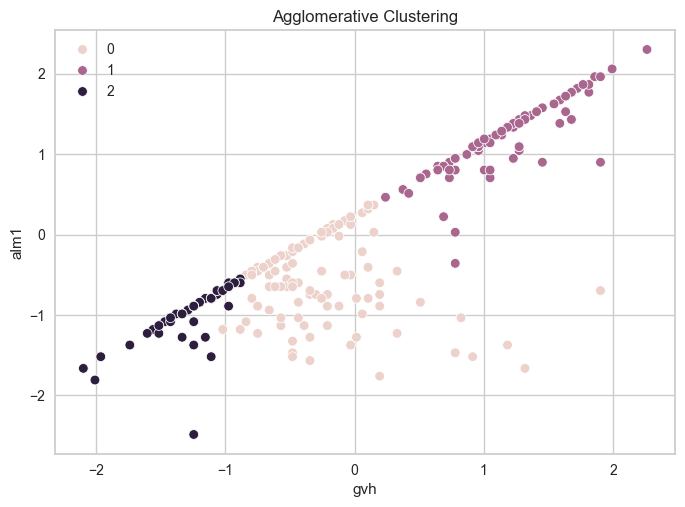

In [100]:
# TODO: Tunjukkan plot berdasarkan hasil clustering yang sudah dilakukan.
sns.scatterplot(x='alm1', y='alm2', hue='Agg_clusters', data=data_with_clusters)
plt.title('Agglomerative Clustering')
plt.xlabel('alm1')
plt.ylabel('alm2')
plt.legend()
plt.show()

# **Latihan Soal Teoritis** [30]

1. Dari hasil clustering yang telah dihasilkan menggunakan `KMeans`, berikan interpretasi mengenai _cluster-cluster_ yang terbentuk! [4]

2. **Selain dari algoritma yang sudah diberitahukan pada bagian sebelumnya**, jelaskan 4 algoritma beserta cara kerjanya secara **singkat** dalam melakukan proses _clustering_! [4]

3. Sebutkan 3 metrik evaluasi yang dapat digunakan untuk mengevaluasi hasil dari _clustering_ serta jelaskan masing-masing dari metrik tersebut! [6]

4. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Menurut pemahaman Anda, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [6]

5. Menurut Anda, mengapa algoritma K-Means tidak baik untuk dapat diterapkan pada data pengelompokkan yang tidak bersifat globular? Jelaskan alasannya berdasarkan cara perhitungan pada algoritma K-Means. [10]

_Note: Untuk menjawab pertanyaan diatas, Anda dapat menambahkan beberapa text cell sesuai kebutuhan_

'### Jawab
1. Berdasarkan hasil evaluasi k-means, didapatkan nilai silhoette score yang paling baik adalah 3 sehingga cluster yang terbentuk adalah 3 cluster. Cluster yang dibentuk didasarkan pada komposisi fitur `alm1` dan `aml2`. Cluster yang pertama ditandai dengan nilai kedua `alm1` dan `alm2` yang rendah `x <= -0.5` dan `y <= 0,5`. Cluster kedua untuk `-0,5 <= x <= 0.5` dan ` y <= 0.5`, serta cluster ketiga untuk `x >= 0,5`. Membandingkan setiap cluster dengan yang lain untuk melihat perbedaan dan kesamaan dapat memberikan insight. Contohnya, jika satu cluster memiliki nilai `alm1` dan `alm2` yang jauh lebih tinggi daripada cluster lain, bisa jadi itu menunjukkan perbedaan fungsional antara dua kelompok tersebut.'

2. 4 Algo Clustering
* DBSCAN (Density-Based Spatial Clustering of Applications with Noise) : mengelompokkan data yang berdekatan dalam satu cluster dengan mengasumsikan bahwa daerah yang padat memiliki lebih banyak data dan daerah yang jarang memiliki sedikit data
* Mean Shift : mencari centroid dari setiap cluster dengan mentranslasikan setiap titik data dalam arah menuju titik dimana memiliki kerapatan data yang maksimum
* Birch (Balanced Iterative Reducing and Clustering using Hierarchies) : membangun struktur tree agar lebih efisien dengan menyimpan informasi dalam bentuk pohon yang dikompresi
* Gaussian Mixture Model (GMM) : Menggunakan probalistik berdasarkan distribusi gauss dengan merepresentasikan distribusi gauss sebagai output cluster

3. 3 Metrik Evaluasi
* Silhouette Score: : menilai presisi penempatan setiap data terhadap dalam sebuah cluster berdasarkan jarak antara data dengan cluster yang sama dibanding cluster lain
* Davies-Bouldin Index : mengukur rata-rata antara kedekatan antar cluster dan jarak antara cluster. Semakin rendah semakin baik
* Adjusted Rand Index (ARI) : mengukur kesamaan antara pengelompokan ground truth dengan hasil clustering
(memerlukan label dahulu untuk dibandingkan seberapa mirip dengan data label)

4. Untuk menghitung intra cluster similarity dapat dengan menggunakan metrik jarak (kemiripan anggota dalam suatu cluster, semakin dekat jarak semakin mirip). Untuk menghitung inter-cluster dissimilarity, depat dengan menggunakan jarak antara kedua cluster yang berbeda, semakin jauh jarak, semakin berbeda dan semakin betul bahwa data tersebut berada pada cluster yang berbeda. Suatu cluster dikatakan baik ketika intra cluster similaritynya tinggi dan inter cluster dissimilaritynya tinggi yang berarti data yang berada pada satu cluster berada disekitar satu sama lain, dan data yang berbeda cluster berada pada jarak yang jauh dari suatu cluster lain.

5. Untuk data yang bersifat globular (berbentuk elips atau lingkaran), k-means cocok karena dia based on centroid. Untuk data non globular, peletakan centroid tidak akan efektif karena centroid terletak pada rata-rata dari semua poin di kluster, jika datanya tidak globular, peletakannya akan sulit karena perhitungan rata-ratanya tidak akan akurat. Selain itu, data non globular biasanya akan menjadi sulat di-klusterisasi karena penentuan centroid yang tidak maksimal karena data tersebut bisa lebih dekat dengan centroid lain, tepapi sebenarnya bukan bagian dari cluster itu.

Reff : 
* https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/
* https://www.geeksforgeeks.org/clustering-metrics/